# Import Libraries

In [9]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define Black-scholes calculating function

According to the following logic:

Call option:
$$C = S \cdot N(d_1) - K \cdot e^{-rT} \cdot N(d_2)n$$

Put option:
$$P = K \cdot e^{-rT} \cdot N(-d_2) - S \cdot N(-d_1)$$

Where:

𝐶 : Call option price \
𝑆 : Current stock price \
𝐾 : Strike price of the option \
𝑇 : Time to maturity (in years) \
𝑟 : Risk-free interest rate (annual) \
𝜎 : Volatility of the underlying stock (annualized standard deviation) \
𝑁(𝑑) : Cumulative distribution function of the standard normal distribution

The terms d1 and d2 are defined as:

$$ d1 = \frac{\ln(S / K) + (r + \sigma^2 / 2) \cdot T}{\sigma \cdot \sqrt{T}} $$ 
$$ d_2 = d_1 - \sigma \cdot \sqrt{T} $$


In [10]:
def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.
    
    Parameters:
    S (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying stock
    
    Returns:
    float: Theoretical call option price
    """
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


## Test function on test data

In [11]:
S = 100  # Current stock price
K = 110  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying stock

call_price = black_scholes_call(S, K, T, r, sigma)
print(f"The Black-Scholes call option price is: {call_price:.2f}")


The Black-Scholes call option price is: 6.04


# Work on live data

## Fetch data from Yahoo finance

In [12]:
stock_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

stock_data

[*********************100%***********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904617,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182610,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700


## Calculate Historic Volatility of Stock Data

In [13]:
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
historical_volatility = stock_data['Daily Return'].std() * np.sqrt(252)

print(f"Historical Volatility: {historical_volatility:.2%}")

Historical Volatility: 19.95%


## Calculate Option Prices for Different Scenarios

In [18]:
strikes = np.arange(80, 121, 5)
maturities = np.arange(0.1, 2.1, 0.5)

option_prices = []
for K in strikes:
    for T in maturities:
        price = black_scholes_call(S, K, T, r, historical_volatility)
        option_prices.append({'Strike': K, 'Maturity': T, 'Call Price': price})

df = pd.DataFrame(option_prices)

In [20]:
df.head(5)

,Strike,Maturity,Call Price
0,80,0.1,20.399208
1,80,0.6,22.653113
2,80,1.1,25.057457
3,80,1.6,27.358538
4,85,0.1,15.431063


# Visualise Results

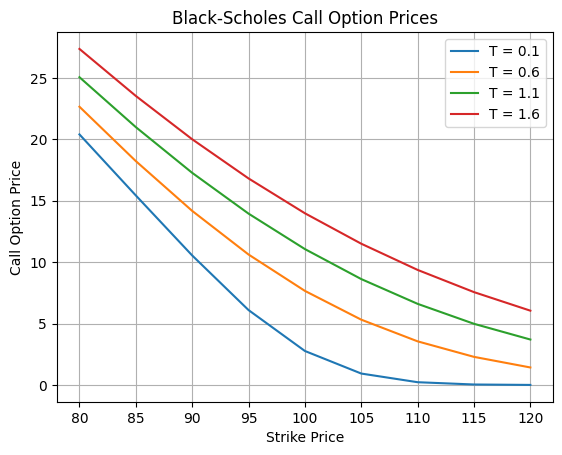

In [21]:
for T in maturities:
    df_maturity = df[df['Maturity'] == T]
    plt.plot(df_maturity['Strike'], df_maturity['Call Price'], label=f'T = {T:.1f}')

plt.title('Black-Scholes Call Option Prices')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()